In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'modules')
functionsdir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
sys.path.insert(0,functionsdir)
for includedir in [moduledir,functionsdir]:
    print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                     for x in glob.glob(os.path.join(includedir,'*.py'))])

from conditionalstats import *
from plot1DInvLog import *

## Input data dir
inputdir = os.path.join(os.path.dirname(workdir),'input')

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

/Users/bfildier/anaconda3/envs/pyLMD/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


Own modules available: ['conditionalstats']
Own modules available: ['plot1DInvLog']


In [3]:
print("import some 2D variables")
file2D = os.path.join(inputdir,'fplane_n01_300_i03_256.2Dcom_1.nc')
varids2drop = ['SHF', 'LHF', 'LWNS', 'LWNSC', 'LWNT', 'LWNTC', 'SWNS', 'SWNSC', 'SWNT', 'SWNTC', 'IntQN', 'IntQP', 'MSE', 'USFC', 'VSFC', 'W500', 'SWVP', 'TSFC', 'QSFC']
ds_2D = xr.open_dataset(file2D,decode_cf=False,drop_variables=varids2drop)

import some 2D variables


In [4]:
print("import some 3D variables")
file3D = os.path.join(inputdir,'fplane_n01_300_i03_256_0000864000.com3D.alltimes.nc')
varids2drop = ['p', 'U', 'V', 'TABS']
ds_3D = xr.open_dataset(file3D,decode_cf=False,drop_variables=varids2drop)

import some 3D variables


In [28]:
print("pick reference time")
dt_2D = np.diff(ds_2D.time)[0] # days
t_0 = 50 # days
i_t2D = int(t_0/dt_2D)
dt_3D = np.diff(ds_3D.time)[0] # days
i_t3D = int(t_0/dt_3D)

pick reference time


In [31]:
print("compute distribution of reference variable")
ref_varid = 'PW'
verbose = False
# Initialize
ref_dist_linear = Distribution(name=ref_varid)
# Compute
ref_dist_linear.computeDistribution(sample=ds_2D[ref_varid][i_t2D].values)
# Compute locations of reference bins
ref_dist_linear.storeSamplePoints(sample=ds_2D[ref_varid][i_t2D].values,verbose=verbose)

compute distribution of reference variable
Finding bin locations...



In [7]:
print('check size')
ref_dist_linear.nlb, ref_dist_linear.nbins

check size


(50, 50)

In [8]:
print("compute conditional distribution for a 2D variable")
verbose = True
cond_varid_2D = 'Prec'
# Initialize
cond_dist_2D = ConditionalDistribution(name=cond_varid_2D,
                                       is3D=False,
                                       refDistribution=ref_dist_linear)
# Compute conditional distributions
cond_dist_2D.computeConditionalMeanAndVariance(sample=ds_2D[cond_varid_2D][i_t2D].values,
                                               verbose=False)


compute conditional distribution for a 2D variable


showing conditional distribution of 2D variable


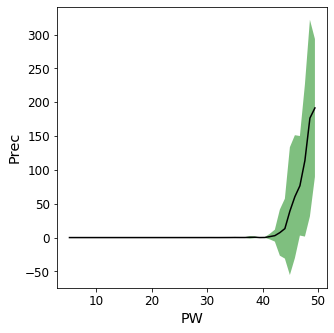


# ALSO PLOT CONDITIONAL VARIANCE AROUND CONDITIONAL MEAN
# INCLUDE SUBPLOT FUNCTION INSIDE CONDITIONALDISTRIBUTION OBJECT
# ADD attributes self.cond_std, self.cond_Q1, self.cond_med, self.cond_Q3 for interquartile range



In [16]:
print("showing conditional distribution of 2D variable")
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(cond_dist_2D.on.percentiles,cond_dist_2D.cond_mean,'k')
ax.set_xlabel(ref_varid)
ax.set_ylabel(cond_varid_2D)

x = cond_dist_2D.on.percentiles
y1 = cond_dist_2D.cond_mean - np.sqrt(cond_dist_2D.cond_var)
y2 = cond_dist_2D.cond_mean + np.sqrt(cond_dist_2D.cond_var)
ax.fill_between(x,y1,y2,where=y2>=y1,facecolor='g',alpha=0.5,interpolate=True)

plt.show()
print("""
# ALSO PLOT CONDITIONAL VARIANCE AROUND CONDITIONAL MEAN
# INCLUDE SUBPLOT FUNCTION INSIDE CONDITIONALDISTRIBUTION OBJECT
# ADD attributes self.cond_std, self.cond_Q1, self.cond_med, self.cond_Q3 for interquartile range
""")

In [46]:
print("compute conditional distribution for a 3D variable")
cond_varid_3D = 'W'
# Initialize
cond_dist_3D = ConditionalDistribution(name=cond_varid_3D,
                                       is3D=True,
                                       refDistribution=ref_dist_linear)
# Compute conditional distributions
cond_dist_3D.computeConditionalMeanAndVariance(ds_3D[cond_varid_3D][i_t3D].values)


compute conditional distribution for a 3D variable


showing conditional distribution of 2D variable

# SHOW AXES
# WRITE PLOTTING METHODS



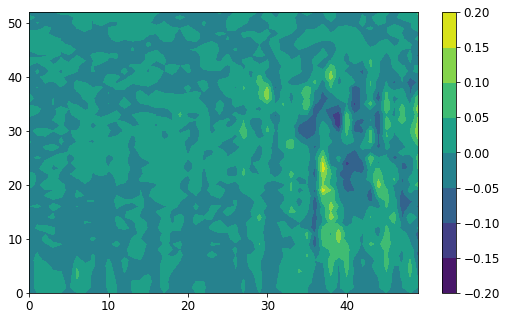

In [48]:
print("showing conditional distribution of 2D variable")
fig,ax = plt.subplots(figsize=(9,5))
h = ax.contourf(cond_dist_3D.cond_mean)
# ax.set_xlabel(ref_varid)
# ax.set_ylabel(cond_varid_2D)
plt.colorbar(h)

print("""
# SHOW AXES
# WRITE PLOTTING METHODS
""")

plt.show()